### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [107]:
df = pd.read_csv('data/coupons.csv')

In [108]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [109]:
# Check for missing values
print(df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [110]:
# Fill missing values for categorical columns with mode
df['car'].fillna(df['car'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)

# Verify if missing values are filled
print(df.isnull().sum())


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [111]:
# Proportion of total observations that chose to accept the coupon
accept_coupon_proportion = df['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {accept_coupon_proportion}")


Proportion of observations that accepted the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

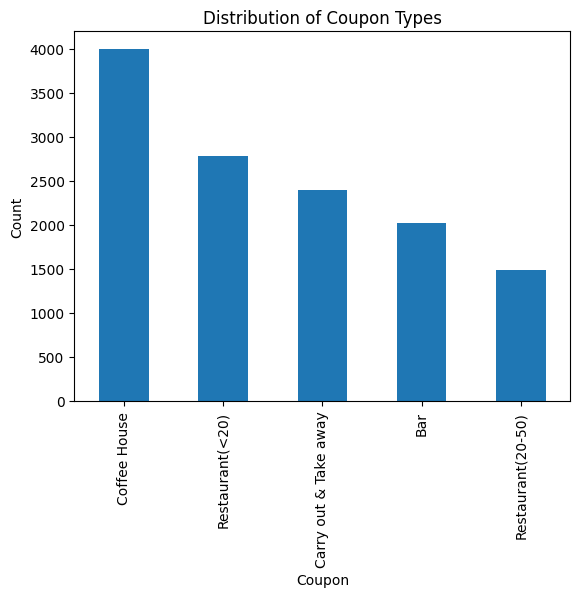

In [112]:
# Bar plot for the 'coupon' column
df['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

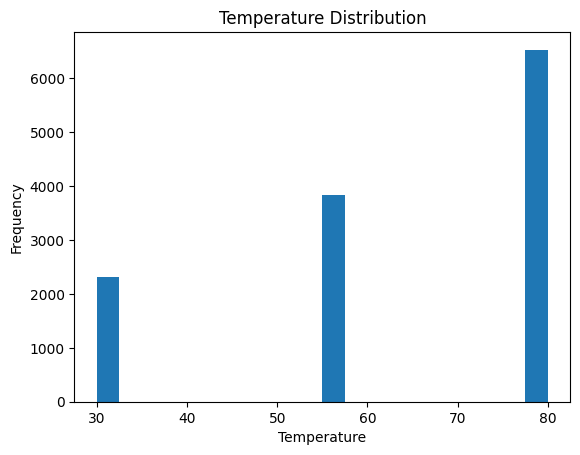

In [113]:
# Histogram for the 'temperature' column
df['temperature'].plot(kind='hist', bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [114]:
# Create a DataFrame that contains just the bar coupons
bar_coupons_df = df[df['coupon'] == 'Bar']
print(bar_coupons_df.head())


        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       1~3   
13  Female  21  Unmarried partner  ...        never       1~3   
17  Female  21  Unmarried partner  ...        never       1~3   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [115]:
# Proportion of bar coupons that were accepted
bar_coupon_acceptance_rate = bar_coupons_df['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_coupon_acceptance_rate}")


Proportion of bar coupons accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [116]:
# Compare acceptance rate based on bar visit frequency
few_visits_categories = ['never', 'less1', '1~3']
more_visits_categories = ['4~8', 'gt8']

few_visits_acceptance_rate = bar_coupons_df[bar_coupons_df['Bar'].isin(few_visits_categories)]['Y'].mean()
more_visits_acceptance_rate = bar_coupons_df[bar_coupons_df['Bar'].isin(more_visits_categories)]['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {few_visits_acceptance_rate}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {more_visits_acceptance_rate}")



Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37073707370737075
Acceptance rate for those who went to a bar more than 3 times a month: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [117]:
# Compare acceptance rate based on bar visit frequency
few_visits_categories = ['never', 'less1', '1~3']
more_visits_categories = ['4~8', 'gt8']

few_visits_acceptance_rate = bar_coupons_df[bar_coupons_df['Bar'].isin(few_visits_categories)]['Y'].mean()
more_visits_acceptance_rate = bar_coupons_df[bar_coupons_df['Bar'].isin(more_visits_categories)]['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {few_visits_acceptance_rate}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {more_visits_acceptance_rate}")


Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37073707370737075
Acceptance rate for those who went to a bar more than 3 times a month: 0.7688442211055276


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [118]:
# Step 5: Acceptance rate for drivers who go to bars more than once a month,
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

# Define the condition
condition_5 = (df['Bar'].isin(['4~8', 'gt8']) & ~df['passanger'].isin(['Kid(s)']) & ~df['occupation'].isin(['Farming Fishing & Forestry']))

# Calculate the acceptance rate
acceptance_rate_condition_5 = df[condition_5]['Y'].mean()
print(f"Acceptance rate for condition 5: {acceptance_rate_condition_5}")


Acceptance rate for condition 5: 0.6223826714801444


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [123]:
# Convert age column to numeric, coerce errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Step 6: Compare the acceptance rates for different conditions

# Define condition 1
condition_6_1 = (df['Bar'].isin(['4~8', 'gt8']) & ~df['passanger'].isin(['Kid(s)']) & (df['maritalStatus'] != 'Widowed'))

# Calculate acceptance rate for condition 1
acceptance_rate_6_1 = df[condition_6_1]['Y'].mean()
print(f"Acceptance rate for condition 6_1: {acceptance_rate_6_1}")

# Define condition 2
condition_6_2 = (df['Bar'].isin(['4~8', 'gt8']) & (df['age'] < 30))

# Calculate acceptance rate for condition 2
acceptance_rate_6_2 = df[condition_6_2]['Y'].mean()
print(f"Acceptance rate for condition 6_2: {acceptance_rate_6_2}")

# Ensure 'RestaurantLessThan20' and 'income' are correct categories
print(df['RestaurantLessThan20'].unique())
print(df['income'].unique())

# Define condition 3 with correct income categories
condition_6_3 = (df['RestaurantLessThan20'].isin(['4~8', 'gt8']) & df['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']))

# Calculate acceptance rate for condition 3
acceptance_rate_6_3 = df[condition_6_3]['Y'].mean()
print(f"Acceptance rate for condition 6_3: {acceptance_rate_6_3}")



Acceptance rate for condition 6_1: 0.6223826714801444
Acceptance rate for condition 6_2: 0.6475583864118896
['4~8' '1~3' 'less1' 'gt8' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Acceptance rate for condition 6_3: 0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [124]:
# Based on the observed acceptance rates, formulate a hypothesis
hypothesis = """
Based on the observed acceptance rates, it appears that drivers who are more socially active, such as those who go to bars more frequently and have adult passengers, are more likely to accept bar coupons. Additionally, younger drivers and those with lower incomes who frequent affordable restaurants may also have a higher acceptance rate for bar coupons. This suggests that social activity, age, and income levels are significant factors influencing coupon acceptance behavior.
"""

print(hypothesis)



Based on the observed acceptance rates, it appears that drivers who are more socially active, such as those who go to bars more frequently and have adult passengers, are more likely to accept bar coupons. Additionally, younger drivers and those with lower incomes who frequent affordable restaurants may also have a higher acceptance rate for bar coupons. This suggests that social activity, age, and income levels are significant factors influencing coupon acceptance behavior.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [126]:
# Filter the DataFrame for Coffee House coupons
coffee_house_df = df[df['coupon'] == 'Coffee House']

# Display the first few rows to inspect the filtered data
coffee_house_df.head()

# Calculate the overall acceptance rate for Coffee House coupons
coffee_house_acceptance_rate = coffee_house_df['Y'].mean()
print(f"Overall acceptance rate for Coffee House coupons: {coffee_house_acceptance_rate}")

# Analyze acceptance rates based on different characteristics

# Acceptance rate by passenger type
acceptance_rate_by_passenger = coffee_house_df.groupby('passanger')['Y'].mean()
print("Acceptance rate by passenger type:")
print(acceptance_rate_by_passenger)

# Acceptance rate by age group
acceptance_rate_by_age = coffee_house_df.groupby('age')['Y'].mean()
print("\nAcceptance rate by age group:")
print(acceptance_rate_by_age)

# Acceptance rate by income group
acceptance_rate_by_income = coffee_house_df.groupby('income')['Y'].mean()
print("\nAcceptance rate by income group:")
print(acceptance_rate_by_income)

# Acceptance rate by occupation
acceptance_rate_by_occupation = coffee_house_df.groupby('occupation')['Y'].mean()
print("\nAcceptance rate by occupation:")
print(acceptance_rate_by_occupation)

# Add more analyses as needed based on other characteristics


Overall acceptance rate for Coffee House coupons: 0.49924924924924924
Acceptance rate by passenger type:
passanger
Alone        0.437943
Friend(s)    0.596906
Kid(s)       0.483092
Partner      0.570492
Name: Y, dtype: float64

Acceptance rate by age group:
age
21.0    0.524349
26.0    0.514828
31.0    0.476726
36.0    0.467662
41.0    0.501538
46.0    0.513636
Name: Y, dtype: float64

Acceptance rate by income group:
income
$100000 or More     0.494382
$12500 - $24999     0.540404
$25000 - $37499     0.473438
$37500 - $49999     0.542373
$50000 - $62499     0.503650
$62500 - $74999     0.436364
$75000 - $87499     0.296610
$87500 - $99999     0.557196
Less than $12500    0.551948
Name: Y, dtype: float64

Acceptance rate by occupation:
occupation
Architecture & Engineering                   0.555556
Arts Design Entertainment Sports & Media     0.507177
Building & Grounds Cleaning & Maintenance    0.727273
Business & Financial                         0.479452
Community & Social Services